# Formula One Constructors Data Science Prep Course Capstone Project
### Prepared by Brian McGuckin

## Introduction
Formula One racing is considered by many to be the pinnacle of motorsport. Sanctioned by the by the Fédération Internationale de l'Automobile (FIA) since 1950, this single seat, open wheel racing series attracts the best racing drivers and teams in the world.

While much of the focus in Formula One (F1) is on the drivers, it is very much a team effort. For this project I will be focusing on the team aspect of F1 and providing analysis of constructor participation, performance, and ultimately success in their F1 racing programs.

__Note:__ in this project the terms 'team' and 'constructor' interchangeably. Prior to 1981, the constructors were allowed to sell car chassis to various F1 teams, and thus the terms were separate. In 1981 the FIA introduced a rule change that required each team to construct its' own chassis, and ever since the two terms effectively have the same meaning (1).

(1) https://en.wikipedia.org/wiki/List_of_Formula_One_constructors#Terminology:_constructors_vs._teams

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset
The dataset I am using consists of 13 different csv files each pertaining to a different aspect of F1 racing. The dataset consists of data from the innagural 1950 season up through the 2017 F1 season, and has been collected by Ergast Developer API, a web service which provides historical record keeping of motor racing data and is in the public domain. Although this dataset includes a wealth of data including race circuits, drivers, qualifying and race lap times, pit stops, not every file is relevant to this analysis and thus the files used for this project are outlined and explored below.

__Formula 1 Race Data:__ https://www.kaggle.com/cjgdev/formula-1-race-data-19502017

### 1) results.csv
23,777 row, 18 column dataframe containing data pertaing to race results F1 races. This file is used to get overall constructor participation and race win data. The relevant columns in this dataframe are 'constructorId' and 'positionOrder'.

In [2]:
results = pd.read_csv('results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


### 2) constructors.csv

208 row, 6 column dataframe which links the 'constructorId' column used as the constructor identifier throughout the dataset to the team name and other pertinent team information. The relevant columns in this dataframe are 'constructorId' and 'name'. Later in the project the links in the 'url' column are used to explain some outlier behavior.

In [3]:
constructors = pd.read_csv('constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


### 3) constructorResults.csv
11,142 row, 5 column dataframe containing the amount of points each constructor scored in each race. This file is used to get constructor points data. The relevant columns in this dataframe are 'constructorId' and 'points'.

In [4]:
constructor_results = pd.read_csv('constructorResults.csv')
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


## Analysis

### 1) Which F1 constructors have participated in the most races?

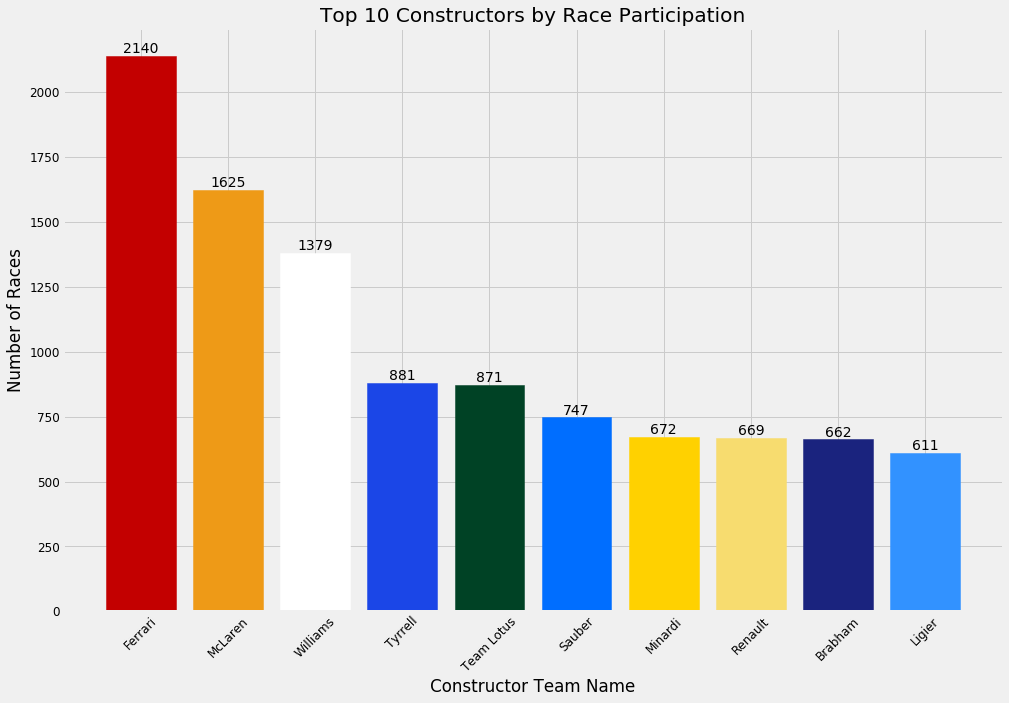

In [5]:
#get a count for races entered and set a dataframe
active_cons = pd.DataFrame(results.constructorId.value_counts())
active_cons.rename(columns = {'constructorId':'numRaces'}, inplace = True)

#join this with the constructors dataset so we know which id belongs to which team
join_cons_res = constructors.set_index('constructorId').join(active_cons, lsuffix = 'cons', rsuffix = 'res')
join_cons_res = join_cons_res.sort_values('numRaces', ascending = False)

#chart dataframe
x_races = join_cons_res.head(10)['name']
y_races = join_cons_res.head(10)['numRaces']
numRaces_values = [] #initiate an empty list to put bar values into

for value in join_cons_res.head(10)['numRaces']: #loop to populate list
    numRaces_values.append(value)

numRaces_values = [int(i) for i in numRaces_values] #convert to ints to drop decimal places

#team color hex codes for better looking bars
ferrari = '#C30000'
mclaren = '#ee9a17'
williams = '#FFFFFF'
tyrrell = '#1b46e7'
team_lotus = '#004225'
sauber = '#006EFF'
minardi = '#ffd100'
renault = '#f7dc6f'
brabham = '#1a237e'
ligier = '#3292ff'
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_numRaces = plt.bar(range(len(x_races)), y_races)

plt_numRaces[0].set_color(ferrari)
plt_numRaces[1].set_color(mclaren)
plt_numRaces[2].set_color(williams)
plt_numRaces[3].set_color(tyrrell)
plt_numRaces[4].set_color(team_lotus)
plt_numRaces[5].set_color(sauber)
plt_numRaces[6].set_color(minardi)
plt_numRaces[7].set_color(renault)
plt_numRaces[8].set_color(brabham)
plt_numRaces[9].set_color(ligier)

rects = plt_numRaces.patches

for rect, value in zip(rects, numRaces_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_races)), join_cons_res.head(10)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Races')
plt.xlabel('Constructor Team Name')
plt.title('Top 10 Constructors by Race Participation')

The results here shouldn't suprise anyone with some historic knowledge of F1; Ferrari is the only constructor to have competed in every single F1 season since 1950 (2) and have thus competed in the most races. McLaren and Williams are also notoriously prolific constructors, however, any F1 fan worth their salt is familiar with every team represented in this top 10.

Note: These race totals are counts for every car entered into a race by their respective constructor. Most often constructors enter 2 cars per race, and this is now in fact bound by the rules (3). Before this rule, however, teams were able to enter more than 2 cars per race and would occasionally field 3rd and even 4th cars, such as Ferrari did for the 1952 Indianapolis 500 (4).

(2) https://en.wikipedia.org/wiki/Scuderia_Ferrari

(3) https://www.formula1.com/en/championship/inside-f1/rules-regs/Spare_cars.html

(4) https://en.wikipedia.org/wiki/History_of_Formula_One#The_era_of_factory_Italian_and_Mercedes_front-engine_cars_(1950%E2%80%931957)

### 2) How are wins distributed amongst F1 constructors?

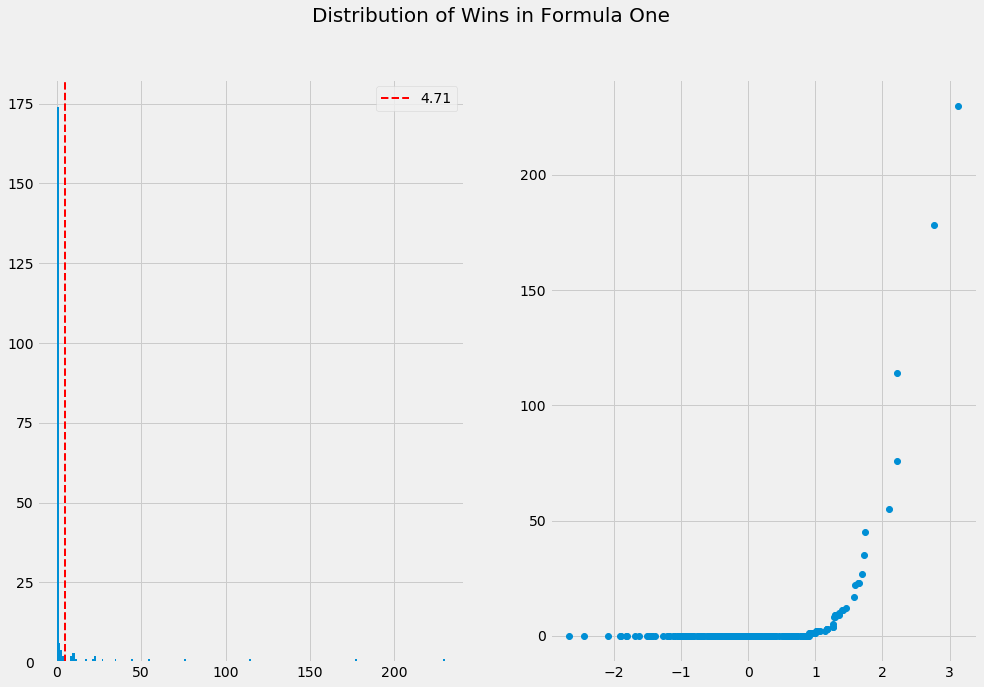

Mode = 0    0.0
dtype: float64


In [6]:
#use the loc and lambda methods to extract out race winners
cons_wins = results.loc[lambda df: results['positionOrder'] == 1, :]
cons_wins = pd.DataFrame(cons_wins.constructorId.value_counts())
cons_wins.rename(columns = {'constructorId':'numWins'}, inplace = True)

#put wins in working dataframe
join_cons_wins = join_cons_res.join(cons_wins)
join_cons_wins['numWins'].fillna(0, inplace=True)

#get mean and round it
mean_wins = join_cons_wins['numWins'].mean()
mean_wins = round(mean_wins,2)

#get mode
mode_wins = join_cons_wins['numWins'].mode()

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt.suptitle('Distribution of Wins in Formula One', fontsize = 20)

plt.subplot(1,2,1)
plt.hist(join_cons_wins['numWins'], bins = len(join_cons_wins))
plt.axvline(mean_wins, color = 'r', linestyle = 'dashed', linewidth = 2, label = mean_wins)
plt.legend()

plt.subplot(1,2,2)
numWins = join_cons_wins['numWins']
numWins = numWins.sort_values(ascending = True)
norm = np.random.normal(0,1,len(join_cons_wins))
norm.sort()
plt.plot(norm, numWins, 'o')

plt.show()
print('Mode = {}'.format(mode_wins))

Win distribution in F1 is far from normal, as this heavily skewed data shows. It more closely follows a Pareto Distribution with a small number of teams holding the majority of the wins. For descriptive purposes I've included the average of 4.71 wins per team which is clearly affected by outliers, as the mode is 0 and the overwhelming majority of teams have not won a single race.

### 3) How do race totals compare to the constructors' win totals?

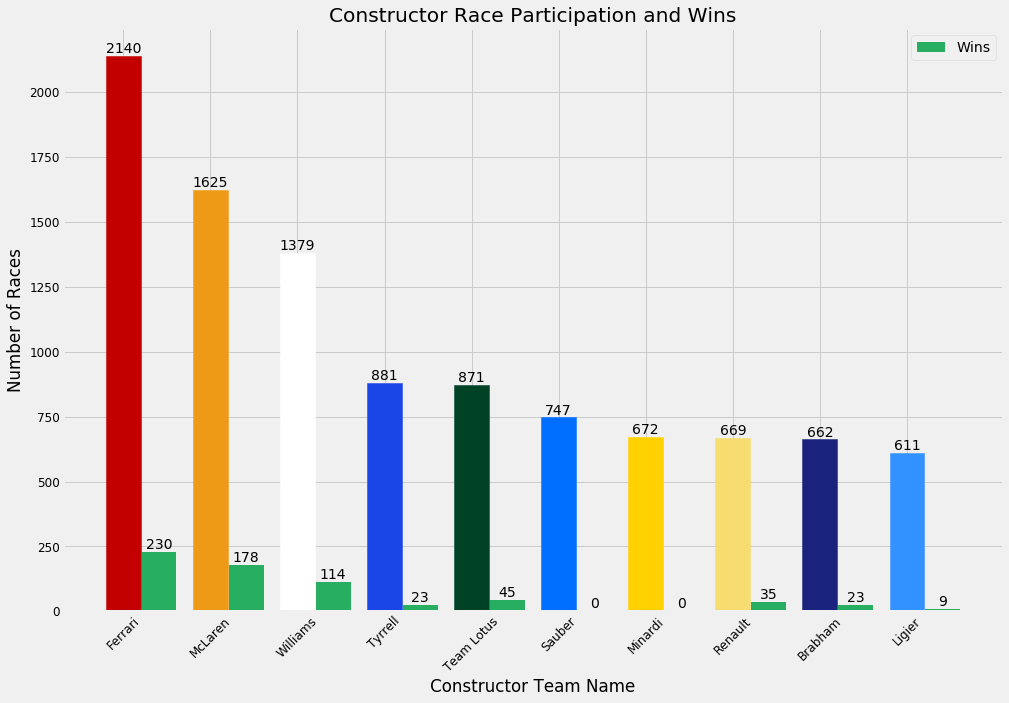

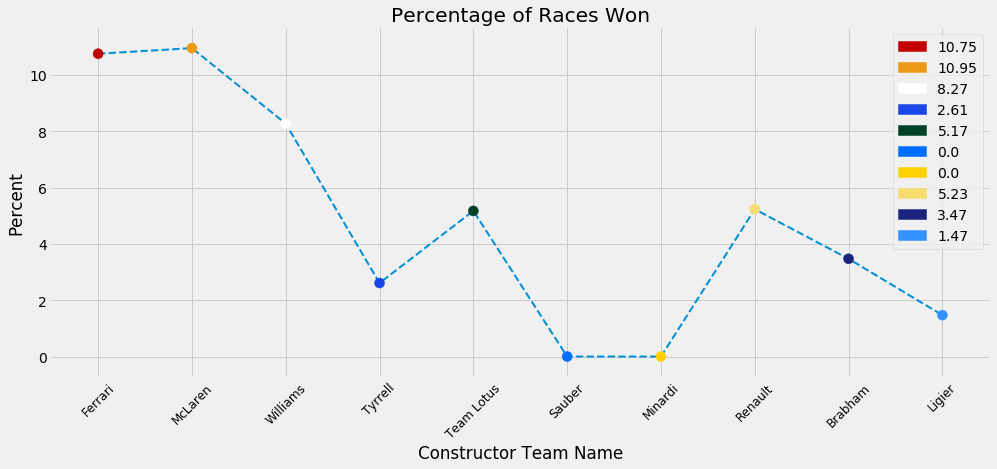

In [7]:
x_wins = range(len(join_cons_wins.head(10)['name']))
y_wins = join_cons_wins.head(10)['numWins']
n = 10
ind = np.arange(n)

numRaces_values = [] #initiate an empty list to put bar values into
for value in join_cons_res.head(10)['numRaces']: #loop to populate list
    numRaces_values.append(value)
numRaces_values = [int(i) for i in numRaces_values] #convert to ints to drop decimal places

numWins_values = []
for value in join_cons_wins.head(10)['numWins']:
    numWins_values.append(value)

a = np.array([numWins_values], dtype=np.float)
b = np.array([numRaces_values], dtype=np.float)
wins_div_races = np.array((a/b)*100)
wins_div_races = pd.DataFrame(wins_div_races)
    
plt.figure(figsize = (15,10))
plt.style.use('fivethirtyeight')
width = 0.4

rects1 = plt.bar(ind, y_races, width)
rects2 = plt.bar(ind + width + 0.01, y_wins, width, color = '#27ae60')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

rects1[0].set_color(ferrari)
rects1[1].set_color(mclaren)
rects1[2].set_color(williams)
rects1[3].set_color(tyrrell)
rects1[4].set_color(team_lotus)
rects1[5].set_color(sauber)
rects1[6].set_color(minardi)
rects1[7].set_color(renault)
rects1[8].set_color(brabham)
rects1[9].set_color(ligier)

plt.xticks(range(len(x_wins)), join_cons_wins.head(10)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.xlabel('Constructor Team Name')
plt.ylabel('Number of Races')
plt.legend(rects2[:1], ['Wins'])
plt.title('Constructor Race Participation and Wins')
plt.show()

#second plot showing percentage of races won
y_avg_wins = [10.75, 10.95, 8.27, 2.61, 5.17, 0.0, 0.0, 5.23, 3.47, 1.47]
colors = [ferrari, mclaren, williams, tyrrell, team_lotus, sauber, minardi, renault, brabham, ligier]

plt.figure(figsize = (15,6))
plt_avg_wins = plt.plot(y_avg_wins, zorder = 1, linestyle = 'dashed', linewidth = 2) #use zorder to put points

plt_avg_scatter = plt.scatter(x_wins, y_avg_wins, s=100, zorder = 2, c=colors, marker = 'o') #on top of line

#create custom legend
import matplotlib.patches as mpatches
ferrari_patch = mpatches.Patch(color=ferrari, label=y_avg_wins[0])
mclaren_patch = mpatches.Patch(color=mclaren, label=y_avg_wins[1])
williams_patch = mpatches.Patch(color=williams, label=y_avg_wins[2])
tyrrell_patch = mpatches.Patch(color=tyrrell, label=y_avg_wins[3])
team_lotus_patch = mpatches.Patch(color=team_lotus, label=y_avg_wins[4])
sauber_patch = mpatches.Patch(color=sauber, label=y_avg_wins[5])
minardi_patch = mpatches.Patch(color=minardi, label=y_avg_wins[6])
renault_patch = mpatches.Patch(color=renault, label=y_avg_wins[7])
brabham_patch = mpatches.Patch(color=brabham, label=y_avg_wins[8])
ligier_patch = mpatches.Patch(color=ligier, label=y_avg_wins[9])
plt.legend(handles=[ferrari_patch, mclaren_patch, williams_patch, tyrrell_patch, team_lotus_patch,
                   sauber_patch, minardi_patch, renault_patch, brabham_patch, ligier_patch],
           loc='upper right')

plt.xticks(range(len(x_wins)), join_cons_wins.head(10)['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.ylabel('Percent')
plt.title('Percentage of Races Won')
plt.show()

The first chart shows how many races each top 10 team has won compared to the number of races they've entered. While one might think that the more races a team has entered, the better chance they have at racking up wins, this isn't always the case. Sauber and Minardi for example have earned their reputations as "second rate" teams having both competed in plenty of races without registering a single victory.

The second chart plots race wins as a percentage of total race participation. While these charts show some very successful teams in aggregate (Ferrari, Mclaren, Williams), this does not necessarily translate to having the best race win percentage.

### 4) Which teams have the highest percentage of races won?

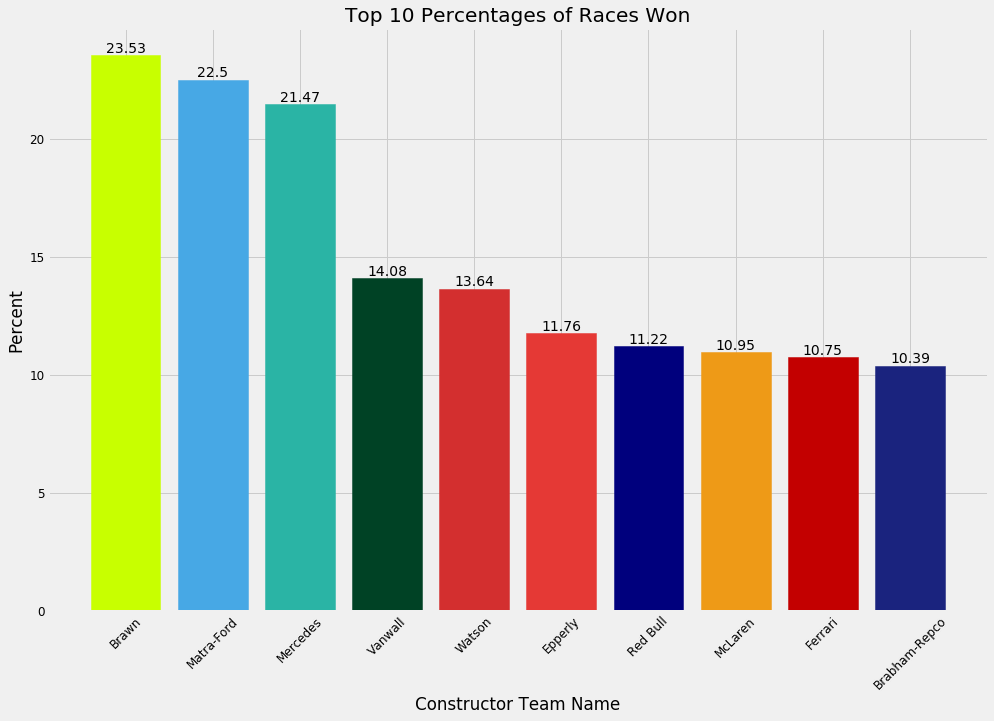

In [8]:
win_pct = pd.DataFrame((join_cons_wins['numWins'] / join_cons_wins['numRaces']) * 100)
win_pct = join_cons_wins.join(win_pct) #join with our working dataframe
win_pct.rename(columns = {0: 'winPercentage'}, inplace = True)
win_pct = win_pct.dropna(subset = ['winPercentage']) #drop teams that haven't won
win_pct = win_pct.round(decimals = 2) #round columns
win_pct = win_pct.sort_values('winPercentage', ascending = False) #sort by win percentage

x_win_pct = win_pct.head(10)['name']
y_win_pct = win_pct.head(10)['winPercentage']
win_values = [] #initiate an empty list to put values into

for value in win_pct.head(10)['winPercentage']: #loop to populate list
    win_values.append(value)

#set some new colors
red_bull = '#00007D'
epperly =  '#e53935'
watson = '#d32f2f'
vanwall = '#004225'
matra = '#47a8e5'
brawn = '#C8FF00'
mercedes = '#2AB4A5'
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_win_pct = plt.bar(range(len(x_win_pct)), y_win_pct)

plt_win_pct[0].set_color(brawn)
plt_win_pct[1].set_color(matra)
plt_win_pct[2].set_color(mercedes)
plt_win_pct[3].set_color(vanwall)
plt_win_pct[4].set_color(watson)
plt_win_pct[5].set_color(epperly)
plt_win_pct[6].set_color(red_bull)
plt_win_pct[7].set_color(mclaren)
plt_win_pct[8].set_color(ferrari)
plt_win_pct[9].set_color(brabham)

rects = plt_win_pct.patches

for rect, value in zip(rects, win_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_win_pct)), win_pct['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.yticks(fontsize = 12)
plt.ylabel('Percent')
plt.title('Top 10 Percentages of Races Won')

plt.show()

This chart shows some potentially suprising results. Brawn GP has the highest winning percentage, however it should be noted that they only competed for a single season (2009) and were able to exploit a loophole in the rules resulting in a much faster car than the rest of the field (4). After the 2009 season, Brawn GP was bought by their engine supplier (Mercedes) and have continued to remain successful as the current iteration of the Mercedes factory team.

Also present are some unfamiliar names here in Watson (5) and Epperly (6). Some investigation reveals that these two teams solely in the Indianapolis 500, which at certain points in history was a race in the World Championship. However this is a very specialized race on an oval racetrack, and historically teams specializing in oval racing would enter the Indy 500 and exclude themselves from the rest of the World Championship. The byproduct of this is that teams that are particularly successful at the Indianapolis 500 have acheived a high win percentage, but are fairly irrelevant of the greater context of the F1 World Championship.

(4) https://en.wikipedia.org/wiki/Brawn_GP

(5) https://en.wikipedia.org/wiki/A._J._Watson

(6) https://en.wikipedia.org/wiki/Quin_Epperly

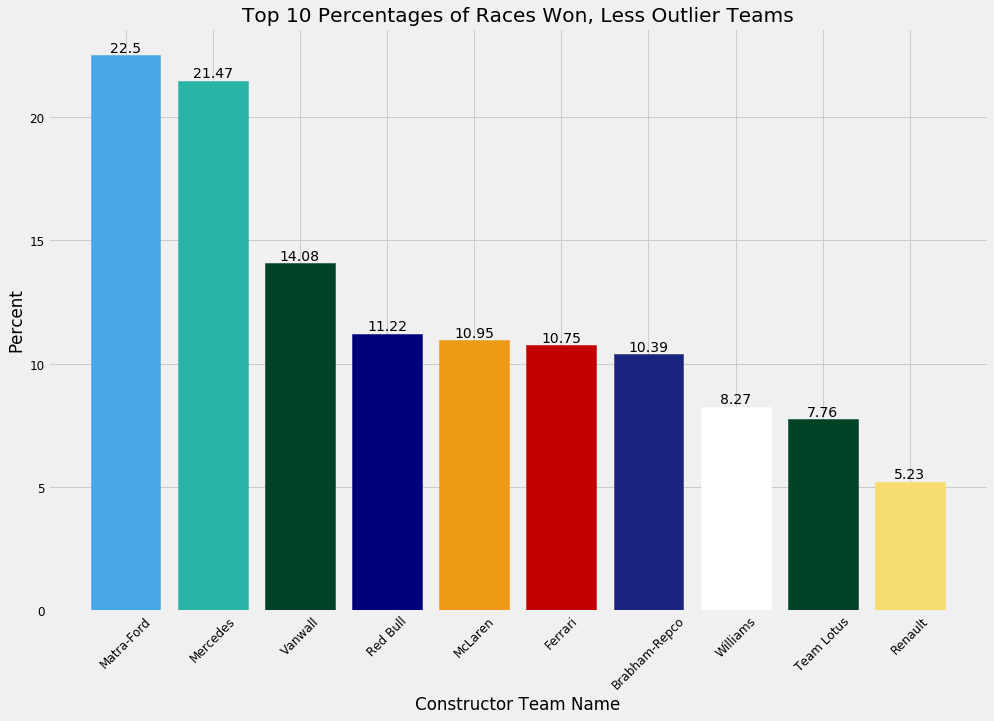

In [9]:
win_pct2 = win_pct[['name', 'winPercentage']].copy() #create custom df
win_pct2 = win_pct2.drop(win_pct2.index[[0,4,5]]) #drop desired rows

lotus_wp = (9.52+8.59+5.17)/3 #combine lotus teams
win_pct3 = win_pct2.drop(win_pct2.index[[8,12]]) #drop desired rows
win_pct3.loc[win_pct3['name'] == 'Lotus-Climax', 'name'] = 'Team Lotus' #format name
win_pct3.loc[win_pct3['name'] == 'Team Lotus', 'winPercentage'] = lotus_wp #update value with new mean
win_pct3 = win_pct3.sort_values('winPercentage', ascending = False) #sort

x_win_pct3 = win_pct3.head(10)['name']
y_win_pct3 = win_pct3.head(10)['winPercentage']
win_values3 = [] #initiate an empty list to put values into

for value in win_pct3.head(10)['winPercentage']: #loop to populate list
    win_values3.append(value)
    
lotus = '#004225'

plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_win_pct3 = plt.bar(range(len(x_win_pct3)), y_win_pct3)

plt_win_pct3[0].set_color(matra)
plt_win_pct3[1].set_color(mercedes)
plt_win_pct3[2].set_color(vanwall)
plt_win_pct3[3].set_color(red_bull)
plt_win_pct3[4].set_color(mclaren)
plt_win_pct3[5].set_color(ferrari)
plt_win_pct3[6].set_color(brabham)
plt_win_pct3[7].set_color(williams)
plt_win_pct3[8].set_color(team_lotus)
plt_win_pct3[9].set_color(renault)

rects = plt_win_pct3.patches

for rect, value in zip(rects, win_values3): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_win_pct3)), win_pct3['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.yticks(fontsize = 12)
plt.ylabel('Percent')
plt.title('Top 10 Percentages of Races Won, Less Outlier Teams')

plt.show()

This is same plot as above, except here Brawn GP, Watson, and Epperly are dropped for their outlier characteristics. As mentioned in the previous cells, Brawn GP only participated in one season of the F1 championship. Watson and Epperly are dropped for similar sample size reasons, and the fact that they only participated in a single, very specialized race which favored their expertise greatly.

Matra's appearance as the best (or second best, depending on method) win percentage here should be addressed, as they have largely been forgotten. While the French team was active from 1965 to 1979, their participation in F1 was limited to the 1967 through 1972 seasons. During this 6 year period their cars were powered by Ford or by an engine of Matra's own design. It is quite evident that their partnership with Ford was particularly fruitful, placing 3rd in the 1968 World Constructors' Championship. In 1969 Matra declined to field their own car in the F1 Champtionship, but instead sold cars for Tyrrell to compete in. It was Tyrrell & legendary driver Jackie Stewart (3x WDC) who in fact won the 1969 WCC for Matra (7).

(7) https://en.wikipedia.org/wiki/Matra_MS80

### 5) Which constructors have scored the most points?

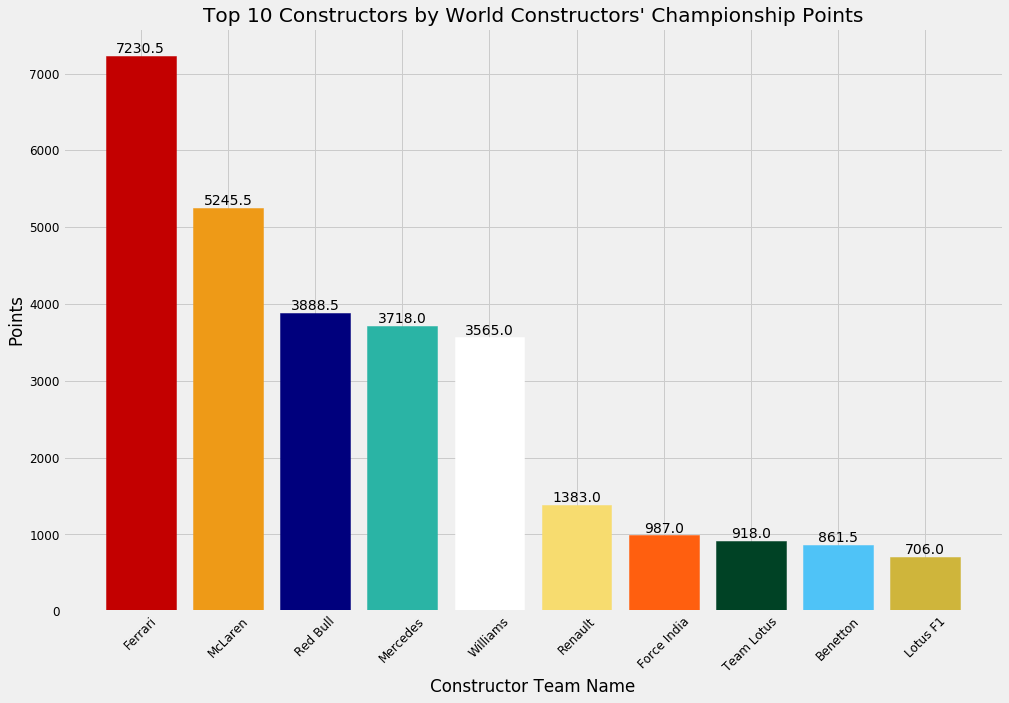

In [10]:
total_points = pd.DataFrame(constructor_results.groupby('constructorId').sum()['points'])
total_points = win_pct.join(total_points) #join with our working df
total_points.rename(columns = {'points':'totalPoints'}, inplace = True)
total_points = total_points.sort_values('totalPoints', ascending = False)

x_points = total_points.head(10)['name']
y_points = total_points.head(10)['totalPoints']
totalPoints_values = [] #initiate an empty list to put values into
   
for value in total_points.head(10)['totalPoints']: #loop to populate list
    totalPoints_values.append(value)

benetton = '#4fc3f7'
force_india = '#FF5F0F'
lotus_f1 = '#cfb53b'
    
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt_totalPoints = plt.bar(range(len(x_points)), y_points)

plt_totalPoints[0].set_color(ferrari)
plt_totalPoints[1].set_color(mclaren)
plt_totalPoints[2].set_color(red_bull)
plt_totalPoints[3].set_color(mercedes)
plt_totalPoints[4].set_color(williams)
plt_totalPoints[5].set_color(renault)
plt_totalPoints[6].set_color(force_india)
plt_totalPoints[7].set_color(team_lotus)
plt_totalPoints[8].set_color(benetton)
plt_totalPoints[9].set_color(lotus_f1)

rects = plt_totalPoints.patches

for rect, value in zip(rects, totalPoints_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_points)), total_points.head(25)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Points')
plt.xlabel('Constructor Team Name')
plt.title('Top 10 Constructors by World Constructors\' Championship Points')

This chart shows that in aggregate, teams that have participated in a large number of races have also scored the most points. However, somewhat unexpectedly, Team Red Bull is in 3rd place. While RB is a relatively young team, they have been very formidible. Force India is another relatively new team that is a bit of a suprise here. Not to detract anything from RB and FI's efforts, simply aggregating points scored is not the most accurate measure here, as the rules regarding which places are awarded points (and how many) have constantly been in a state of flux (8). 

A note on how the FIA awards points for suspended races: If a race is suspended and cannot be restarted, full points are awarded as long as 75% of the total race distance has been completed. If less than 75% has been completed, half points are awarded (this how we get fractional point totals). If less than 2 laps of the race have been completed, no points are awarded (9).

(8) https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems#Points_scoring_systems

(9) https://www.formula1.com/en/championship/inside-f1/rules-regs/Classification_Race_distance_and_Points.html

### 6) Which team is the most efficient at scoring points?

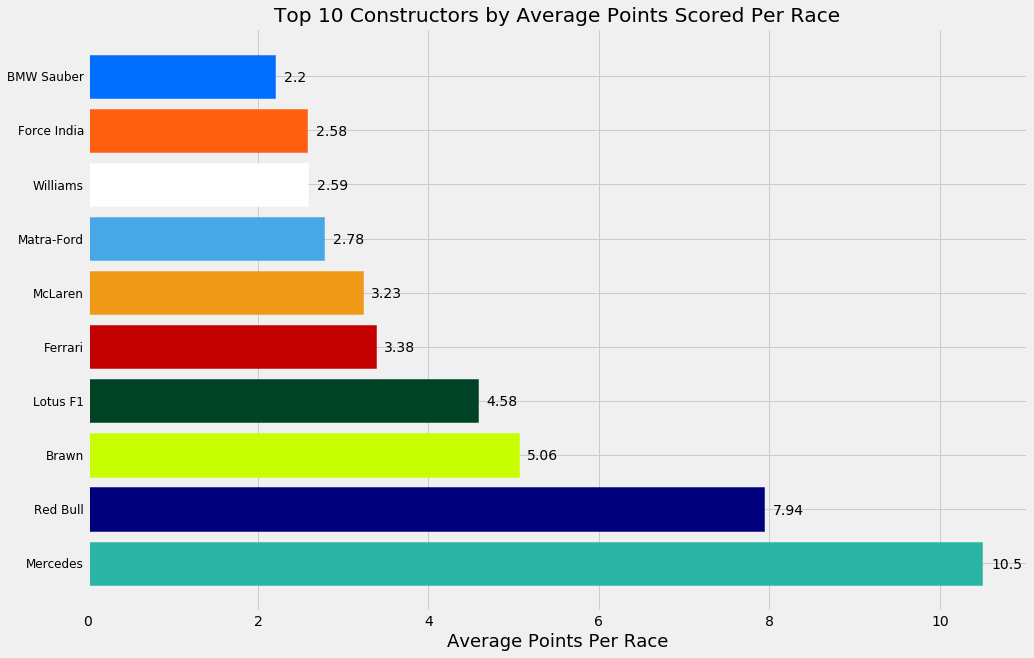

In [11]:
points_per_race = pd.DataFrame(total_points['totalPoints'] / total_points['numRaces'])
points_per_race = total_points.join(points_per_race)
points_per_race.rename(columns = {0:'pointsPerRace'}, inplace = True)
points_per_race = points_per_race.round(decimals = 2) #round columns
points_per_race = points_per_race.sort_values('pointsPerRace', ascending = False)

points_per_race_x = points_per_race.head(10)['name']
points_per_race_y = points_per_race.head(10)['pointsPerRace']
ppr_values = [] #initiate an empty list to put values into
   
for value in points_per_race.head(10)['pointsPerRace']: #loop to populate list
    ppr_values.append(value)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt_ppr = plt.barh(range(len(points_per_race_x)), points_per_race_y)
plt_ppr[0].set_color(mercedes)
plt_ppr[1].set_color(red_bull)
plt_ppr[2].set_color(brawn)
plt_ppr[3].set_color(lotus)
plt_ppr[4].set_color(ferrari)
plt_ppr[5].set_color(mclaren)
plt_ppr[6].set_color(matra)
plt_ppr[7].set_color(williams)
plt_ppr[8].set_color(force_india)
plt_ppr[9].set_color(sauber)
plt.yticks(range(len(points_per_race_x)), points_per_race.head(10)['name'], fontsize = 12)
plt.xlabel('Average Points Per Race', fontsize = 18)
plt.title('Top 10 Constructors by Average Points Scored Per Race')

for i, v in enumerate(ppr_values):
   plt.text(v + .1, i - .1, str(v), fontsize = 14)

plt.show()

It is clear that Mercedes is by far the most efficient team at scoring points. While their participation in F1 has been inconsistent, it is evident that when they do decide to field an F1 team, they do so with great degrees of success. It should also be noted here that while this is a better measure than the aggregations above, one would still expect the results to skew in favor of successful teams that participate under regulations where more points are awarded and for more positions.

## Conclusion and Further Research
Here I have attempted to use data to provide insights into the success rate of F1 constructors. Among F1 followers, there isn't much disagreement that Ferrari, McLaren, and Williams are historically some of the most successful teams in F1. Likewise, especially taking the modern era into consideration, Mercedes (incl. Brawn) and Red Bull have enjoyed much success, and this is shown by their inclusion the later analysis.

Further analysis on this data I would like to perform includes designing a method of normalizing the points system across different regulations to see who was truly the most efficient at scoring points, as well as comparing those results to the ones presented here. Another common indicator of success is the number of podiums (1st, 2nd, & 3rd positions) a team has registered, and a measure of podium performance might uncover some interesting results. Additionally, this dataset does not include World Constructor Championship results per season, which would be the ultimate measure of success in F1 from the constructors' perspective. This would be valuable data to introduce into this analysis in future versions.

Delving deeper, I would like to include some analysis broken down by different car formulas. The formula is the incredibly complex set of technical regulations that determines how teams are to build their cars, and controls engine sizes, tires, aerodynamics, car electronics, and everything inbetween (10). Major changes between these technical regulations are referred to as 'eras' and it would be interesting to see which teams had the most success in the various eras of the F1 formula.

(10) https://en.wikipedia.org/wiki/Formula_racing